<a href="https://colab.research.google.com/github/jiwankahbra/SteamReviews/blob/main/CSI4810_FInal_Text_Mining_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install steam reviews
! pip install steamreviews

In [ ]:
# import all necessary libraries

import json
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import steamreviews
import random
import pandas as pd
import numpy as np

In [ ]:
# chose an app_id I am using the app_id for Apex Legends
app_id = 1172470

# fetch the reviews specifiying english reviews only
review_dict, query_count = steamreviews.download_reviews_for_app_id(app_id,
                                                                    chosen_request_params={'language': 'english'})


[appID = 1172470] expected #reviews = 413597


In [ ]:
# since fetching the reviews do take a long time, use the json file created from the steam reviews to access the data from here on forward
app_id = 1172470

# specifiy file path
file_path = f'data/review_{app_id}.json'

# load the json reviews
try:
  with open(file_path, 'r') as f:
    json_reviews = json.load(f)
    reviews = [review['review'] for review in json_reviews['reviews'].values()]
    print(f"Successfully loaded {len(reviews)} reviews from {file_path}")
except FileNotFoundError:
  print(f"File not found: {file_path}")

Successfully loaded 414083 reviews from data/review_1172470.json


In [ ]:
# lets take a look at all differnt fields in the review dictionary
sample_review = list(json_reviews['reviews'].values())[0]
print(sample_review.keys())
print(len(sample_review))

dict_keys(['recommendationid', 'author', 'language', 'review', 'timestamp_created', 'timestamp_updated', 'voted_up', 'votes_up', 'votes_funny', 'weighted_vote_score', 'comment_count', 'steam_purchase', 'received_for_free', 'written_during_early_access', 'primarily_steam_deck'])
15


In [ ]:
# print random 5 reviews

for i in range(5):
  print(random.choice(reviews))
  print('\n')

69 hours pog


updates are kinda a letdown but if your good at the game its pretty fun



why all my friends get legend skin and im not


sure, do it



I'm gonna have to be kinda honest and it pains me to say this. Apex isn't really as fun as it used to be, I'm not sure if it's just me or I'm having to cope too hard but I cannot go one game without getting absolutely murdered in only a few hits in mere minutes of landing. I just hardly find enjoyment and fun in this game as I used to when I hopped on a lot with my friends on PS4. Game has also changed a lot with shit nerfs, voiceline removals, bullshit weapons, and overall not much of a fun experience as it used to be. My name is literally named Pathfinder because of this game and it kinda breaks my heart having to bash it this much.




postive reviews: 322570
negative reviews: 91513


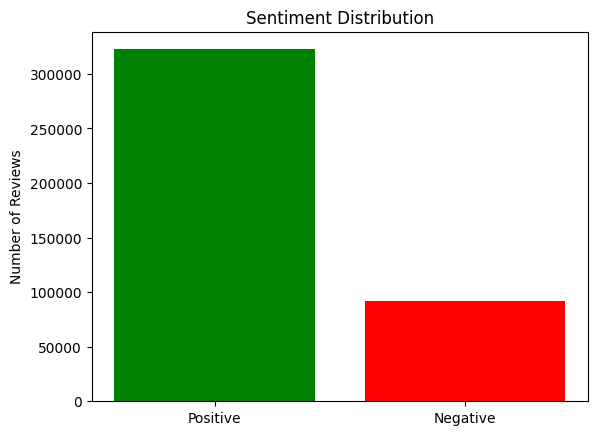

In [ ]:
# Check positve vs negative number of reviews using the voted_up field

sentiments = [review['voted_up'] for review in json_reviews['reviews'].values()]
sentiment_counts = Counter(sentiments)

print(f'postive reviews: {sentiment_counts[True]}')
print(f'negative reviews: {sentiment_counts[False]}')

# plot the distribution

labels = ['Positive', 'Negative']
counts = [sentiment_counts[True], sentiment_counts[False]]
plt.bar(labels, counts, color=['green', 'red'])
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution')
plt.show()

Average Review Length: 15.66 words


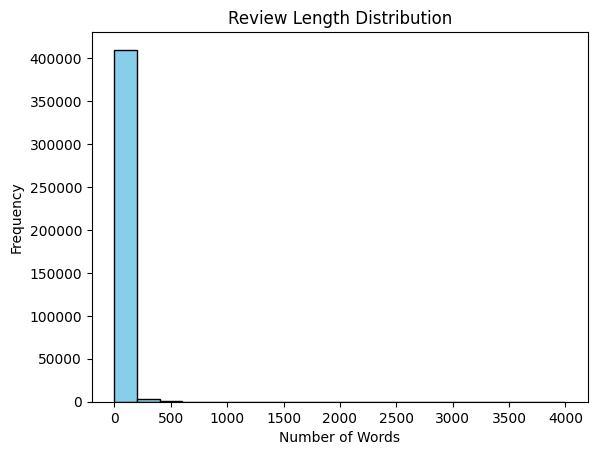

In [ ]:
# find the avg length of each review
review_lengths = [len(review.split()) for review in reviews]
avg_length = sum(review_lengths) / len(review_lengths)
print(f"Average Review Length: {avg_length:.2f} words")

# show plt of this
plt.hist(review_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# print random 5 reviews, along with its sentiments

random_indices = random.sample(range(len(reviews)), 5)
for idx in random_indices:
  print(f"Review {idx+1}: {reviews[idx]}")
  print(f"Sentiment: {'Positive' if sentiments[idx] else 'Negative'}")
  print()

Review 263856: bussin

Sentiment: Positive

Review 403433: One of the most fun battle royales out there. Incredibly aggressive monetization model but yet not P2W.

Wish it had other modes. Feel like the characters would work absurdly well in Overwatch style matches.
Sentiment: Positive

Review 60302: Such a cool game! these rpg roguelike games are truly changing the gaming genre!!!
Sentiment: Positive

Review 154559: ,
Sentiment: Positive

Review 241127: Terrible server connection setup for players
Sentiment: Negative



In [ ]:
# Pair each review with its sentiment
paired_reviews = list(zip(reviews, sentiments))
len(paired_reviews)

414083

In [ ]:
# removed empty reviews
removed_empty  = [(review, sentiment) for review, sentiment in paired_reviews if review.strip()]
len(removed_empty)

412297

In [ ]:
#remove duplicates reviews
unique_reviews = list(set(removed_empty))
len(unique_reviews)

281427

In [ ]:
import re

# create functinon to remove non textual characters
def remove_non_textual_reviews(reviews):

  filtered_reviews = []
  for review, sentiment in reviews:
    # Remove reviews with too many non-alphanumeric characters
    if len(re.findall(r'\W', review)) / len(review) > 0.5:
      continue

    # Remove reviews with too many repeated characters
    if any(len(match.group(0)) > 3 for match in re.finditer(r'(.)\1+', review)):
      continue

    # Remove reviews that are too short
    if len(review.split()) < 3:
      continue

    filtered_reviews.append((review, sentiment))

  return filtered_reviews

In [ ]:
# remove non_textual reviews
filtered_reviews = remove_non_textual_reviews(unique_reviews)
len(filtered_reviews)

225440

In [ ]:
# remove reviews that are not in english using langid
! pip install langid

import langid

def is_english_langid(text):
    # Check if the text is English or not
    lang, _ = langid.classify(text)
    return lang == 'en'

def filter_english_reviews(reviews_with_sentiments):
    # Fileter out non-english reviews
    filtered_reviews = [
        (review, sentiment) for review, sentiment in reviews_with_sentiments if is_english_langid(review)
    ]
    return filtered_reviews


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=b445e295d176a0f6d21dd924f7bdd7cd16b4d8b03228fc236124dfabca52d441
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [ ]:
# remove reviews that are not english
filtered_reviews2 = filter_english_reviews(filtered_reviews)
len(filtered_reviews2)

In [ ]:
# since up to this time it took a long time save it to a json file
import json

# Convert tuples to a list of dictionaries
filtered_reviews2_dicts = [{'review': review, 'sentiment': sentiment} for review, sentiment in filtered_reviews2]

# create file path
output_file_path = f'data/filtered_reviews2_{app_id}.json'

# Save  JSON file
with open(output_file_path, 'w', encoding='utf-8') as json_file:
    json.dump(filtered_reviews2_dicts, json_file, ensure_ascii=False, indent=4)

print(f"Filtered reviews saved to {output_file_path}")


In [ ]:
# load up the saved json file

app_id = 1172470

# specify path
input_file_path = f'data/filtered_reviews2_{app_id}.json'

# Load  JSON file
with open(input_file_path, 'r', encoding='utf-8') as json_file:
    loaded_filtered_reviews2 = json.load(json_file)

# Convert the list of dictionaries back to a list of tupes
filtered_reviews2 = [(item['review'], item['sentiment']) for item in loaded_filtered_reviews2]

print(f"Loaded {len(filtered_reviews2)} filtered reviews from {input_file_path}")

Loaded 203030 filtered reviews from data/filtered_reviews2_1172470.json


In [ ]:
# i want to randomly select 50,000 reviews, 25,000 from postive sentiment and 25,000 from negative
postive_reviews = [review for review, sentiment in filtered_reviews2 if sentiment]
negative_reviews = [review for review, sentiment in filtered_reviews2 if not sentiment]

print(len(postive_reviews))
print(len(negative_reviews))

140221
62809


In [ ]:
random_positive_reviews = random.sample(postive_reviews, 25000)
random_negative_reviews = random.sample(negative_reviews, 25000)
Final_reviews = random_positive_reviews + random_negative_reviews
len(random_positive_reviews)
print(len(Final_reviews))

50000


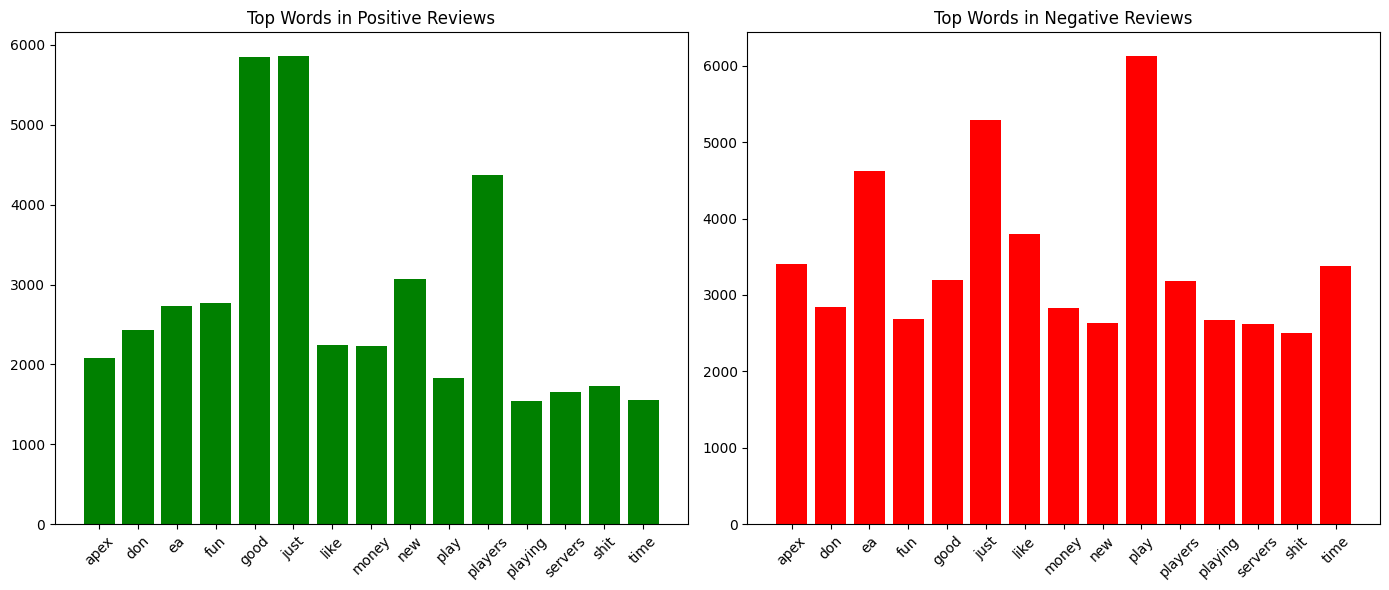

In [ ]:
# Combine the datasets for visualization
labels = [1] * len(random_positive_reviews) + [0] * len(random_negative_reviews)
reviews = random_positive_reviews + random_negative_reviews

# find Word Frequency
all_words = ' '.join(reviews)
word_freq = Counter(all_words.split())
common_words = word_freq.most_common(20)

# find the setnimetn word contrubiton
custom_stop_words = ['game']
vectorizer = CountVectorizer(stop_words='english')

# Get the default stopwords
default_stop_words = vectorizer.get_stop_words()

 # Combine with custom stopwords
all_stop_words = list(default_stop_words) + custom_stop_words

# use countvectoirzer
tfidf_vectorizer = CountVectorizer(stop_words=all_stop_words, max_features=15)
positive_tfidf = tfidf_vectorizer.fit_transform(random_positive_reviews).sum(axis=0).tolist()[0]
negative_tfidf = tfidf_vectorizer.fit_transform(random_negative_reviews).sum(axis=0).tolist()[0]

# plot the data
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(tfidf_vectorizer.get_feature_names_out(), positive_tfidf, color='green')
ax[0].set_title("Top Words in Positive Reviews")
ax[0].tick_params(axis='x', rotation=45)
ax[1].bar(tfidf_vectorizer.get_feature_names_out(), negative_tfidf, color='red')
ax[1].set_title("Top Words in Negative Reviews")
ax[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#  Add game to the stopwords
custom_stop_words = ['game']

# Use default English stopwords
vectorizer = CountVectorizer(stop_words='english')

 # Get the default stopwords
default_stop_words = vectorizer.get_stop_words()

 # Combine with custom stopwords
all_stop_words = list(default_stop_words) + custom_stop_words

# Reinitialize CountVectorizer with updated stopwords
vectorizer = CountVectorizer(stop_words=all_stop_words)

# Fit and transform the cleaned reviews
X = vectorizer.fit_transform(Final_reviews)

# Convert the TDM to a DataFrame
tdm = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

tdm.head()

,00,000,0001,0002,000hr,000kills,000mb,001,003,0045,...,𝙖𝙣𝙮𝙤𝙣𝙚,𝙖𝙧𝙚,𝙜𝙚𝙩,𝙞𝙣𝙩𝙤,𝙧𝙚𝙖𝙙𝙞𝙣𝙜,𝙧𝙚𝙘𝙤𝙢𝙢𝙚𝙣𝙙,𝙨𝙩𝙧𝙤𝙣𝙜𝙡𝙮,𝙩𝙝𝙞𝙨,𝙩𝙤,𝙬𝙖𝙣𝙩𝙞𝙣𝙜
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


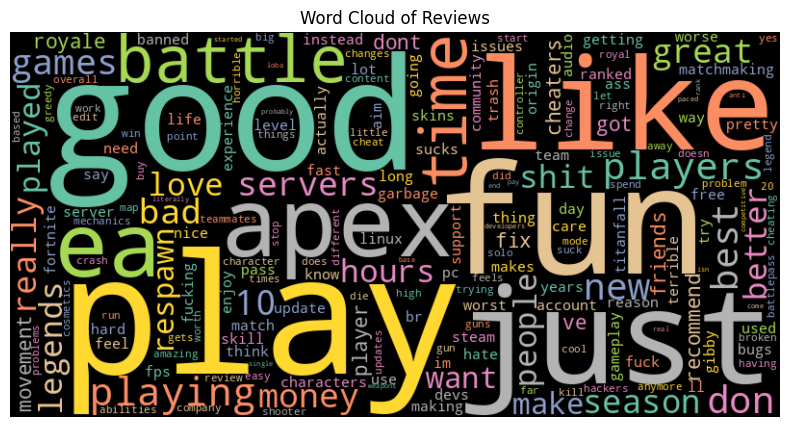

In [ ]:
from wordcloud import WordCloud

# Generate a Word Cloud from the TDM
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Set2').generate_from_frequencies(tdm.sum())

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.show()


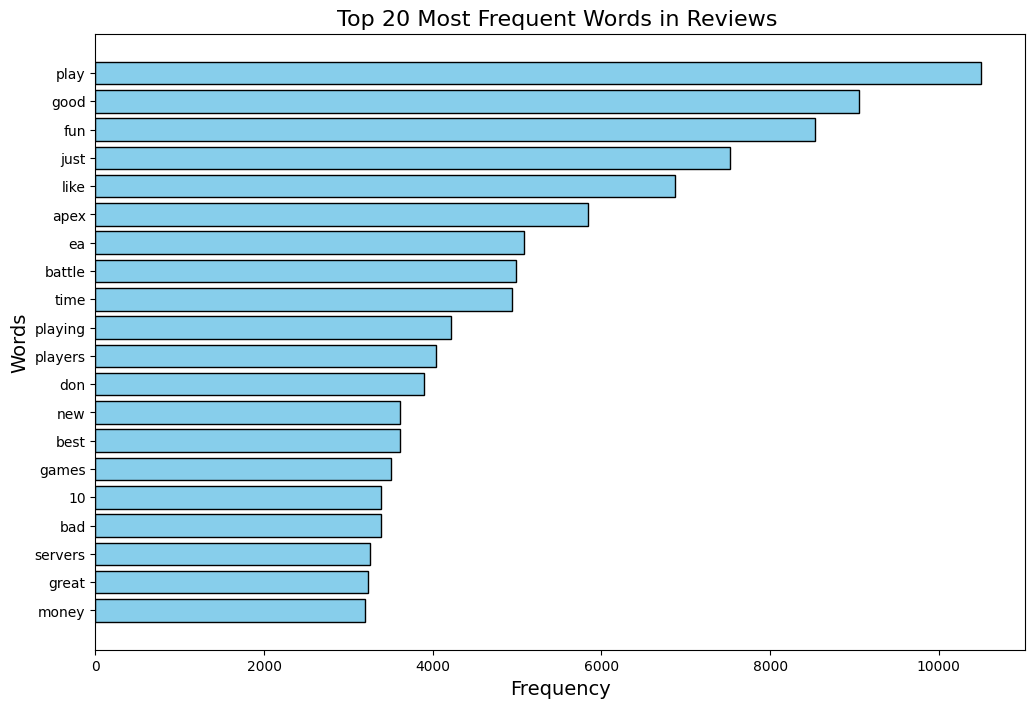

In [ ]:
# Sum the frequencies of each term
word_frequencies = tdm.sum(axis=0)

# create a DataFrame
word_freq_df = pd.DataFrame({'Word': tdm.columns, 'Frequency': word_frequencies})

# Top 20 words
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Plot the Word Frequency Graph
plt.figure(figsize=(12, 8))
plt.barh(word_freq_df['Word'], word_freq_df['Frequency'], color='skyblue', edgecolor='black')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.title("Top 20 Most Frequent Words in Reviews ", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Words", fontsize=14)
plt.show()

In [ ]:
# Pair the reviews and sentiments
paired_final_reviews = [(review, 1) for review in random_positive_reviews] + [(review, 0) for review in random_negative_reviews]
# Shuffle the paired reviews and sentiments
random.shuffle(paired_final_reviews)

In [ ]:
# Limit vocabulary size to 10,000
vectorizer = CountVectorizer(max_features=10000)

reviews, sentiments = zip(*paired_final_reviews)
X = vectorizer.fit_transform(reviews)
y = np.array(sentiments)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# create intial modesl and use n-fold cross validation
logistic_reg_model_1 = LogisticRegression(max_iter=1000, solver='lbfgs')
n_folds = 5
scores = cross_val_score(logistic_reg_model_1, X_train, y_train, cv=n_folds, scoring='accuracy')
mean_accuracy_cv = np.mean(scores)
std_cv = np.std(scores)


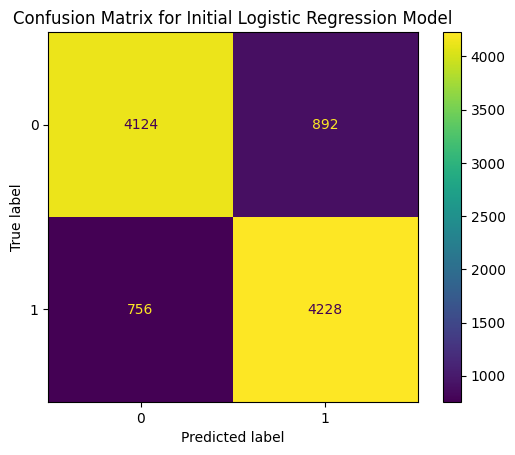

Mean Accuracy for Cross-Validation: 0.8328
Standard Deviation for Cross-Validation: 0.0029


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Fit the logistic regression model
logistic_reg_model_1.fit(X_train, y_train)

# Make predictions
y_pred = logistic_reg_model_1.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.title('Confusion Matrix for Initial Logistic Regression Model')
plt.show()

# Print the results for initial model
print(f'Mean Accuracy for Cross-Validation: {mean_accuracy_cv:.4f}')
print(f'Standard Deviation for Cross-Validation: {std_cv:.4f}')


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.82      0.83      5016
    Positive       0.83      0.85      0.84      4984

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



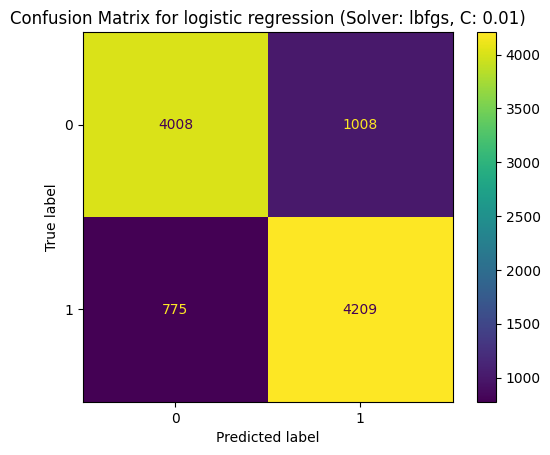

Logistic Regresion Model (Solver: lbfgs, C: 0.01):
Mean Accuracy for Cross-Validation 0.8223
Standard Deviation for Cross-Validation 0.0039


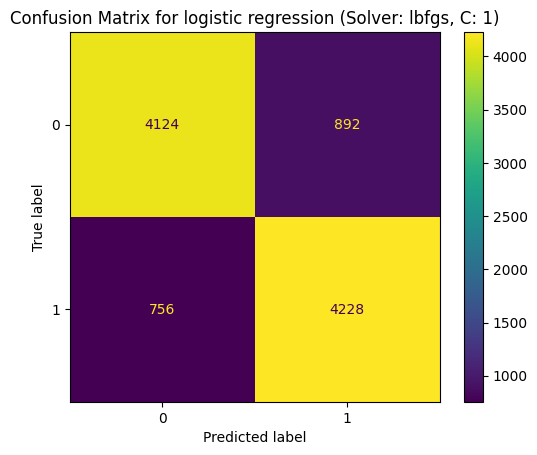

Logistic Regresion Model (Solver: lbfgs, C: 1):
Mean Accuracy for Cross-Validation 0.8328
Standard Deviation for Cross-Validation 0.0029


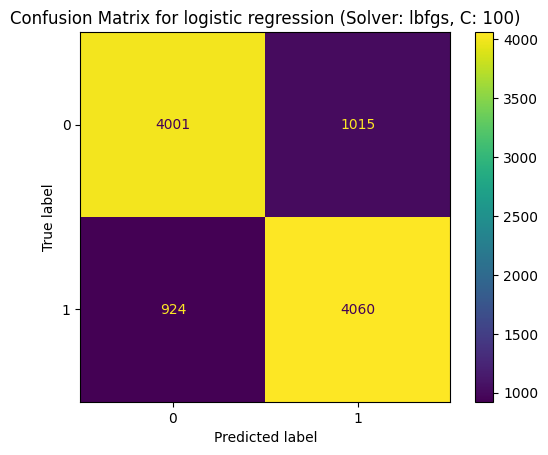

Logistic Regresion Model (Solver: lbfgs, C: 100):
Mean Accuracy for Cross-Validation 0.8071
Standard Deviation for Cross-Validation 0.0044


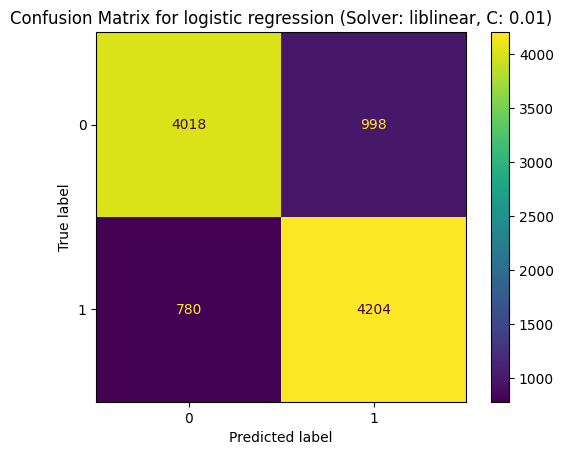

Logistic Regresion Model (Solver: liblinear, C: 0.01):
Mean Accuracy for Cross-Validation 0.8225
Standard Deviation for Cross-Validation 0.0037


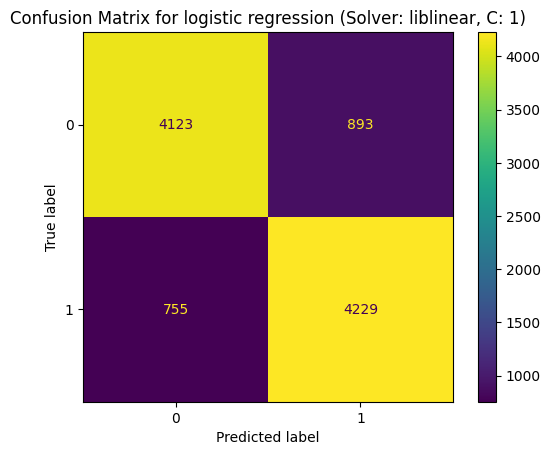

Logistic Regresion Model (Solver: liblinear, C: 1):
Mean Accuracy for Cross-Validation 0.8327
Standard Deviation for Cross-Validation 0.0032


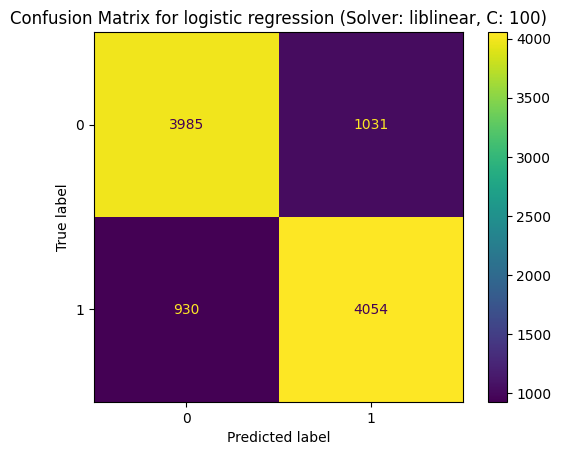

Logistic Regresion Model (Solver: liblinear, C: 100):
Mean Accuracy for Cross-Validation 0.8043
Standard Deviation for Cross-Validation 0.0061


In [ ]:
# create multiple different logistic regression models

# create the parameters to change
c_values = [0.01, 1, 100]
solvers = ['lbfgs', 'liblinear']

# store the results of the models
results = []

# loop over each c_value for each solver

for solver in solvers:
  for c_value in c_values:
    # create the model
    model = LogisticRegression(max_iter=1000, solver=solver, C=c_value)

    # fit the model
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # find mean accuracy and standard deviation
    scores = cross_val_score(model, X_train, y_train, cv=n_folds, scoring='accuracy')
    mean_accuracy_cv = np.mean(scores)
    std_cv = np.std(scores)

    # save the results
    results.append({
      'Solver': solver,
      'c_value': c_value,
      'Mean_accuracy_cv': mean_accuracy_cv,
      'Std_cv': std_cv
    })

    # create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=cm)
    display.plot()
    plt.title(f'Confusion Matrix for logistic regression (Solver: {solver}, C: {c_value})')
    plt.show()

    # print the results

    print(f'Logistic Regresion Model (Solver: {solver}, C: {c_value}):')
    print(f'Mean Accuracy for Cross-Validation {mean_accuracy_cv:.4f}')
    print(f'Standard Deviation for Cross-Validation {std_cv:.4f}')

In [ ]:
# now for nn_models
import json
import tensorflow as tf
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


app_id = 1172470

# Define the file path where you saved the filtered reviews
input_file_path = f'data/filtered_reviews2_{app_id}.json'

# Load the JSON file
with open(input_file_path, 'r', encoding='utf-8') as json_file:
    loaded_filtered_reviews2 = json.load(json_file)

# Convert the list of dictionaries back to a list of tuples
filtered_reviews2 = [(item['review'], item['sentiment']) for item in loaded_filtered_reviews2]

print(f"Loaded {len(filtered_reviews2)} filtered reviews from {input_file_path}")

Loaded 203030 filtered reviews from data/filtered_reviews2_1172470.json


In [ ]:
# i want to randomly select 50,000 reviews, 25,000 from postive sentiment and 25,000 from negative
postive_reviews = [review for review, sentiment in filtered_reviews2 if sentiment]
negative_reviews = [review for review, sentiment in filtered_reviews2 if not sentiment]

import random
random_positive_reviews = random.sample(postive_reviews, 25000)
random_negative_reviews = random.sample(negative_reviews, 25000)
Final_reviews = random_positive_reviews + random_negative_reviews

# Pair the reviews and sentiments
paired_final_reviews = [(review, 1) for review in random_positive_reviews] + [(review, 0) for review in random_negative_reviews]
# Shuffle the paired reviews and sentiments
random.shuffle(paired_final_reviews)

# Split back into reviews (X) and sentiments (Y)
X = [review for review, sentiment in paired_final_reviews]
Y = [sentiment for review, sentiment in paired_final_reviews]

# Vectorize the text data using CountVectorizer
# Maximum number of features
max_features = 10000
vectorizer = CountVectorizer(max_features=max_features, stop_words='english')
X_vectorized = vectorizer.fit_transform(X).toarray()

from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_vectorized, Y, test_size=0.2, random_state=42)


In [ ]:
# intial model
nn_model_1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

#compile model
nn_model_1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model_1.fit(X_train, np.array(Y_train), epochs=5, validation_data=(X_test, np.array(Y_test)), batch_size=64)

# Step 5: Plot the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


# Generate predictions and evaluate the model
Y_pred = (nn_model_1.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Model 2 Accuracy: {accuracy * 100:.2f}%")

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

plt.show()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.7628 - loss: 0.4986 - val_accuracy: 0.8244 - val_loss: 0.3920
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.8673 - loss: 0.3139 - val_accuracy: 0.8256 - val_loss: 0.4003
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.8901 - loss: 0.2575 - val_accuracy: 0.8236 - val_loss: 0.4507
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9172 - loss: 0.2034 - val_accuracy: 0.8166 - val_loss: 0.5465
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9407 - loss: 0.1469 - val_accuracy: 0.8109 - val_loss: 0.6628


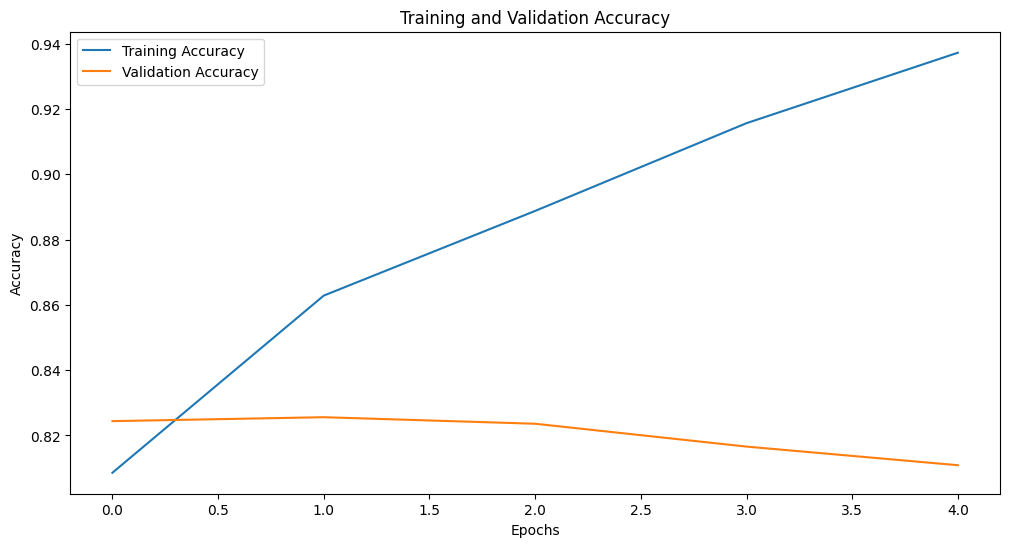

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Model 2 Accuracy: 81.09%


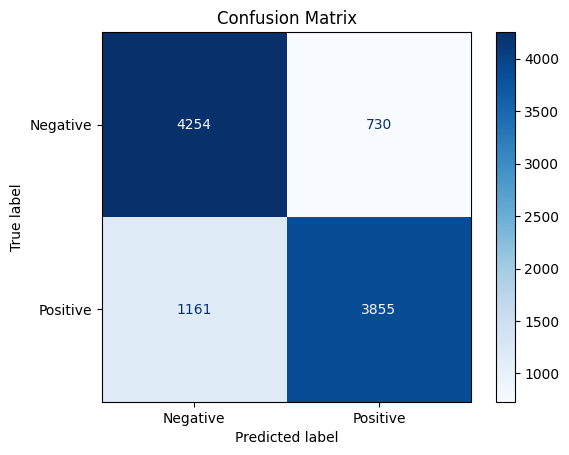

In [ ]:
nn_model_2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

#compile model
nn_model_2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model_2.fit(X_train, np.array(Y_train), epochs=5, validation_data=(X_test, np.array(Y_test)), batch_size=64)

# Plot the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


# Generate predictions and evaluate the model
Y_pred = (nn_model_2.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Model 2 Accuracy: {accuracy * 100:.2f}%")

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

plt.show()



In [ ]:
nn_model_3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

#compile model
nn_model_3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model_3.fit(X_train, np.array(Y_train), epochs=5, validation_data=(X_test, np.array(Y_test)), batch_size=64)

# Plot the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


# Generate predictions and evaluate the model
Y_pred = (nn_model_3.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Model 3 Accuracy: {accuracy * 100:.2f}%")

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

plt.show()



In [ ]:
nn_model_4 = Sequential([
    Dense(32, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(16, activation='tanh'),
    Dense(1, activation='sigmoid')
])

#compile model
nn_model_4.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model_4.fit(X_train, np.array(Y_train), epochs=5, validation_data=(X_test, np.array(Y_test)), batch_size=64)

# Plot the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


# Generate predictions and evaluate the model
Y_pred = (nn_model_4.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Model 4 Accuracy: {accuracy * 100:.2f}%")

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

plt.show()



In [ ]:
nn_model_5 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

#compile model
nn_model_5.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model_5.fit(X_train, np.array(Y_train), epochs=5, validation_data=(X_test, np.array(Y_test)), batch_size=64)

# Plot the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


# Generate predictions and evaluate the model
Y_pred = (nn_model_5.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Model 5 Accuracy: {accuracy * 100:.2f}%")

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

plt.show()



In [ ]:
nn_model_6 = Sequential([
    Dense(64, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

#compile model
nn_model_6.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model_6.fit(X_train, np.array(Y_train), epochs=5, validation_data=(X_test, np.array(Y_test)), batch_size=64)

# Plot the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


# Generate predictions and evaluate the model
Y_pred = (nn_model_6.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Model 6 Accuracy: {accuracy * 100:.2f}%")

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

plt.show()



In [ ]:
nn_model_7 = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

#compile model
nn_model_7.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model_7.fit(X_train, np.array(Y_train), epochs=5, validation_data=(X_test, np.array(Y_test)), batch_size=64)

# Plot the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


# Generate predictions and evaluate the model
Y_pred = (nn_model_7.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Model 7 Accuracy: {accuracy * 100:.2f}%")

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

plt.show()



In [ ]:
nn_model_8 = Sequential([
    Dense(128, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

#compile model
nn_model_8.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model_8.fit(X_train, np.array(Y_train), epochs=5, validation_data=(X_test, np.array(Y_test)), batch_size=64)

# Plot the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


# Generate predictions and evaluate the model
Y_pred = (nn_model_8.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Model 8 Accuracy: {accuracy * 100:.2f}%")

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

plt.show()



In [ ]:
nn_model_9 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

#compile model
nn_model_9.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model_9.fit(X_train, np.array(Y_train), epochs=5, validation_data=(X_test, np.array(Y_test)), batch_size=64)

# Plot the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


# Generate predictions and evaluate the model
Y_pred = (nn_model_9.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Model 9 Accuracy: {accuracy * 100:.2f}%")

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

plt.show()



In [ ]:
nn_model_10 = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='tanh'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
])

#compile model
nn_model_10.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model_10.fit(X_train, np.array(Y_train), epochs=5, validation_data=(X_test, np.array(Y_test)), batch_size=64)

# Plot the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


# Generate predictions and evaluate the model
Y_pred = (nn_model_10.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Model 10 Accuracy: {accuracy * 100:.2f}%")

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

plt.show()

